## Initialisation

In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_group import BenchmarkGroup
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter
from joinbench.benchmark_group_plotter import BenchmarkGroupPlotter
from joinbench.benchmark_group_table_generator import BenchmarkGroupTableGenerator

In [3]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.figsize': [6, 4],
    "figure.autolayout": True,
})

In [4]:
def generate_figure_path(name: str) -> str:
    return f"../report/figures/{name.replace(' ', '-')}.pgf"
def generate_table_path(name: str) -> str:
    return f"../report/tables/{name.replace(' ', '-')}.tex"
def save_df_as_table(df: pd.DataFrame, name: str) -> None:
    path: str = generate_table_path(name)
    df.style.to_latex(path, hrules=True)

## Exploring data

In [5]:
benchmarks: BenchmarkGroup = BenchmarkGroup.load_with_counts([10, 25, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], path="../data/")
benchmark = benchmarks.get_benchmark_with_count(1000)

In [6]:
names = benchmark.get_report_names_in_order()
names

['join onePercent and onePercent/Product equijoin',
 'join onePercent and onePercent/Comprehension equijoin',
 'join onePercent and onePercent/Indexed equijoin',
 'join onePercent and twentyPercent/Product equijoin',
 'join onePercent and twentyPercent/Comprehension equijoin',
 'join onePercent and twentyPercent/Indexed equijoin',
 'join twentyPercent and onePercent/Product equijoin',
 'join twentyPercent and onePercent/Comprehension equijoin',
 'join twentyPercent and onePercent/Indexed equijoin',
 'join onePercent and fiftyPercent/Product equijoin',
 'join onePercent and fiftyPercent/Comprehension equijoin',
 'join onePercent and fiftyPercent/Indexed equijoin',
 'join evenOnePercent and oddOnePercent/Product equijoin',
 'join evenOnePercent and oddOnePercent/Comprehension equijoin',
 'join evenOnePercent and oddOnePercent/Indexed equijoin']

In [7]:
group_names = benchmark.get_benchmark_group_names()
group_names

{'join evenOnePercent and oddOnePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and onePercent',
 'join onePercent and twentyPercent',
 'join twentyPercent and onePercent'}

In [8]:
group_map = benchmark.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join onePercent and onePercent': [(0, 'Product equijoin'),
              (1, 'Comprehension equijoin'),
              (2, 'Indexed equijoin')],
             'join onePercent and twentyPercent': [(3, 'Product equijoin'),
              (4, 'Comprehension equijoin'),
              (5, 'Indexed equijoin')],
             'join twentyPercent and onePercent': [(6, 'Product equijoin'),
              (7, 'Comprehension equijoin'),
              (8, 'Indexed equijoin')],
             'join onePercent and fiftyPercent': [(9, 'Product equijoin'),
              (10, 'Comprehension equijoin'),
              (11, 'Indexed equijoin')],
             'join evenOnePercent and oddOnePercent': [(12,
               'Product equijoin'),
              (13, 'Comprehension equijoin'),
              (14, 'Indexed equijoin')]})

In [9]:
benchmark.get_benchmark_mean_from_index(0)

0.01741151652775584

### Basic graphs

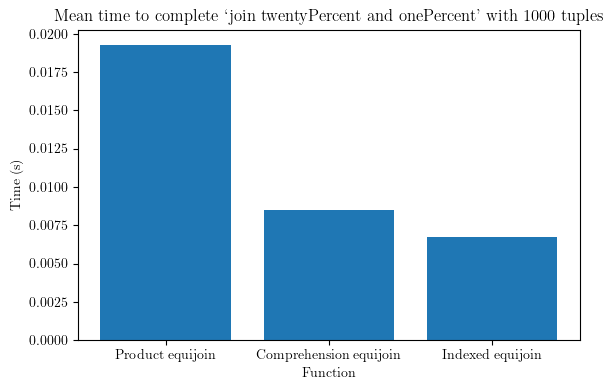

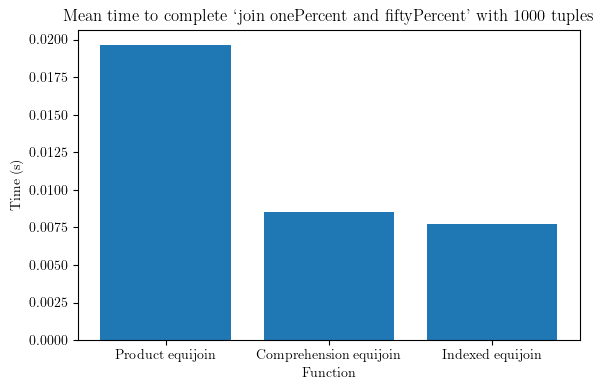

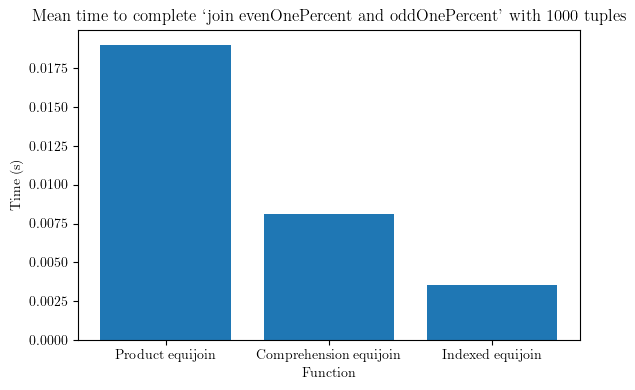

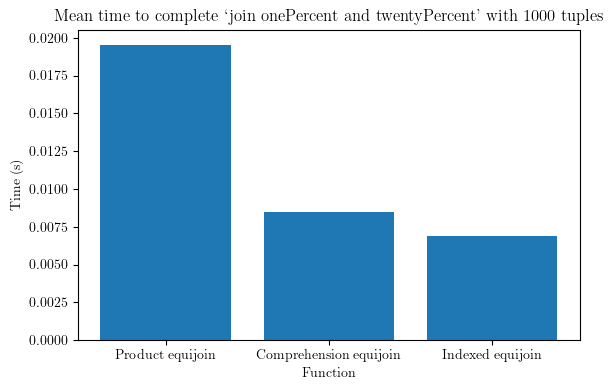

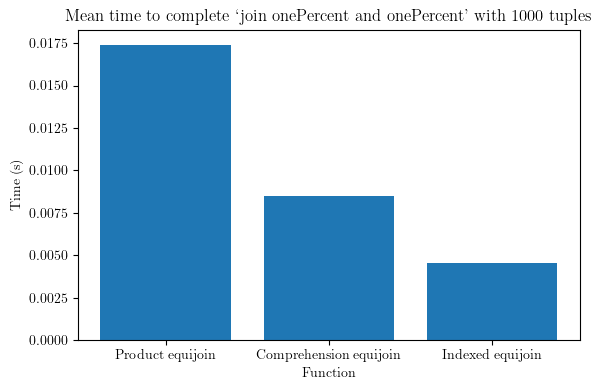

In [10]:
plotter = BenchmarkPlotter(benchmark)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
    plt.savefig(generate_figure_path(f"{group_name}-{benchmark.get_tuple_count()}"))
plt.show()

In [11]:
benchmark.get_benchmark_mean('join onePercent and onePercent', 'Product equijoin')

0.01741151652775584

In [12]:
print(benchmark.get_benchmark_mean('join onePercent and twentyPercent', 'Comprehension equijoin'))
print(benchmark.get_benchmark_mean('join twentyPercent and onePercent', 'Comprehension equijoin'))

0.008504242831562014
0.008500079559409844


## Teseting evaluation form

In [13]:
EVAL_TEST_COUNT = 1000
nf = benchmarks.get_benchmark_with_count(EVAL_TEST_COUNT)
whnf = BenchmarkData.load_with_count(EVAL_TEST_COUNT, path="../data/whnf/")

In [14]:
whnf_plotter = BenchmarkPlotter(whnf)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [15]:
bg = list(whnf.get_benchmark_group_names())[0]
bg

'join twentyPercent and onePercent'

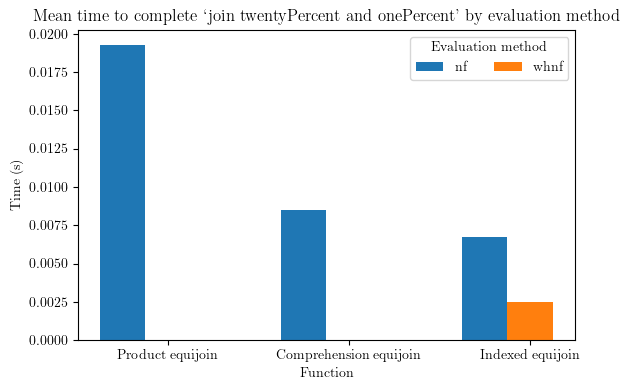

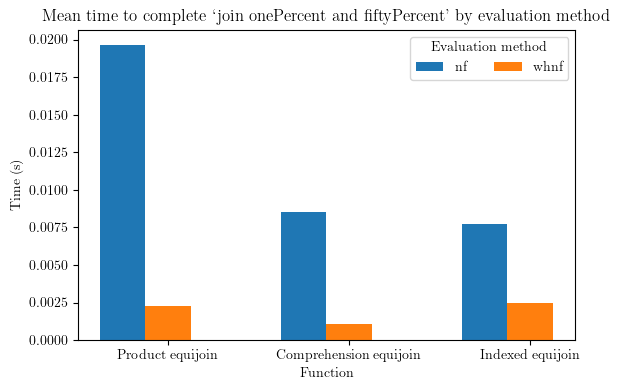

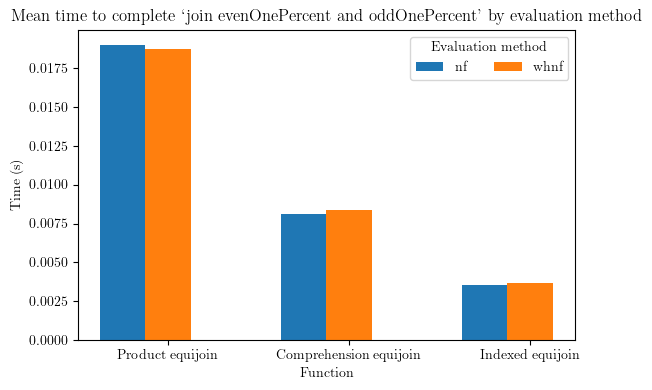

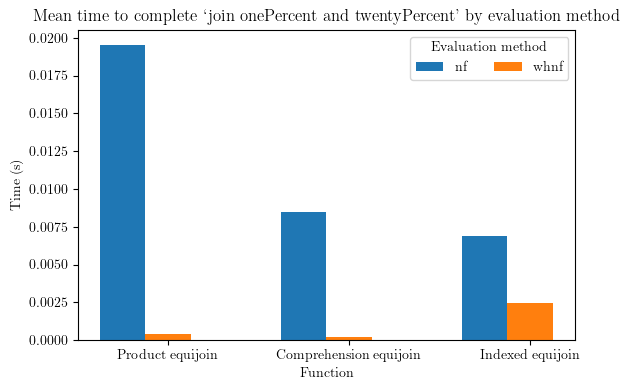

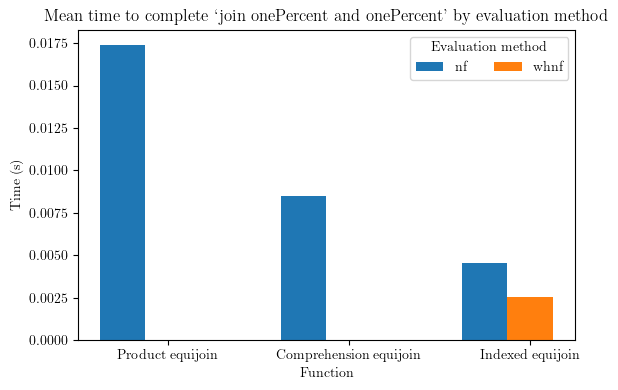

In [16]:
emp = EvaluationMethodPlotter(nf, whnf)

for group in nf.get_benchmark_group_names():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, group)
    plt.savefig(generate_figure_path(f"eval-method-{group_name}"))
    plt.show()

## Testing difference with tuple count

In [17]:
xs = benchmarks.get_tuple_counts()
xs

[10,
 25,
 50,
 100,
 250,
 500,
 750,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]

In [18]:
benchmark.get_function_name_list()

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

### No inset

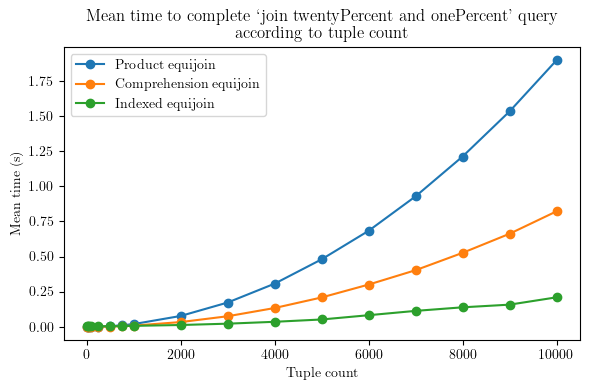

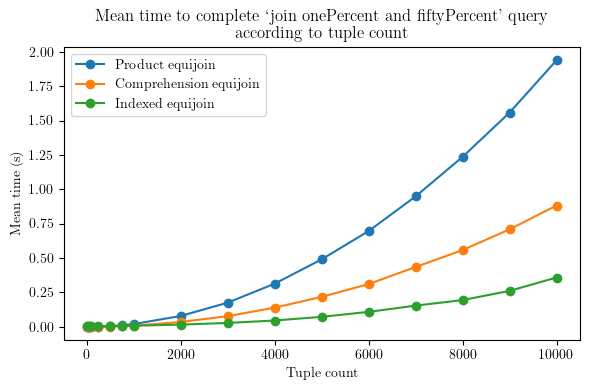

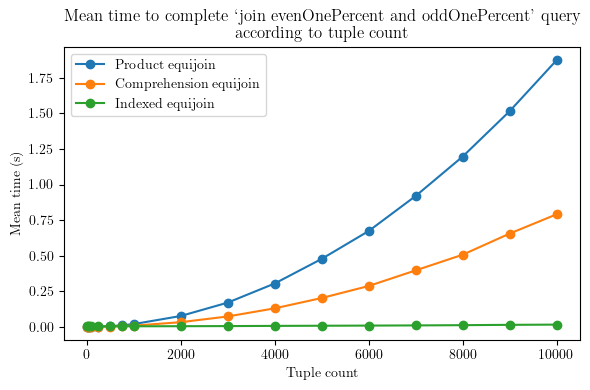

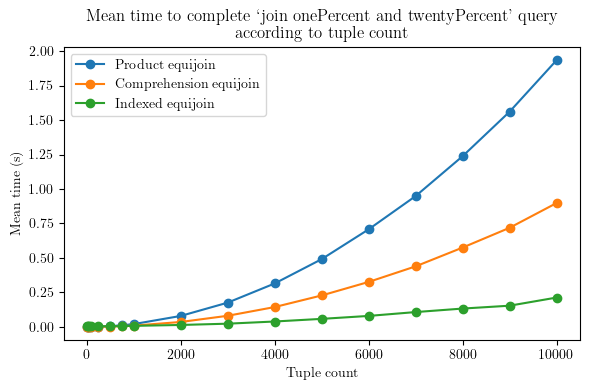

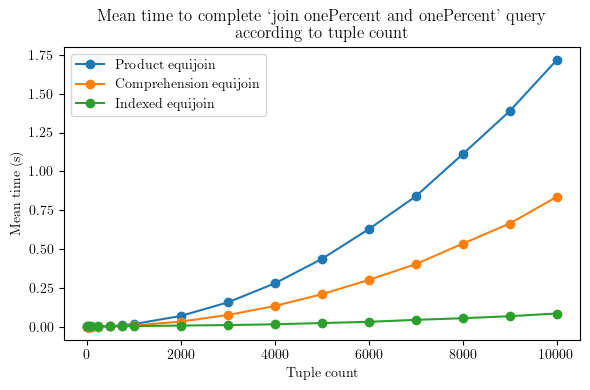

In [19]:
group_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(benchmarks)

groups = benchmark.get_benchmark_group_names()

for group in groups:
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group}-by-tuples"))

## Test with different counts

### Only small counts

In [20]:
NUM_COUNT: int = 8
lesser_counts = sorted(benchmarks.get_tuple_counts())[:NUM_COUNT]
lesser_counts_group: BenchmarkGroup = benchmarks.make_subgroup_with_counts(lesser_counts)
lesser_counts_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(lesser_counts_group)

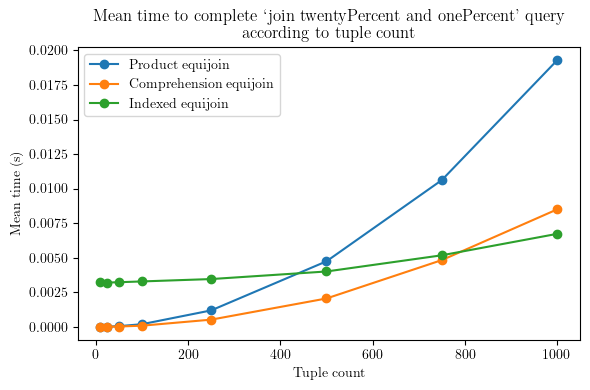

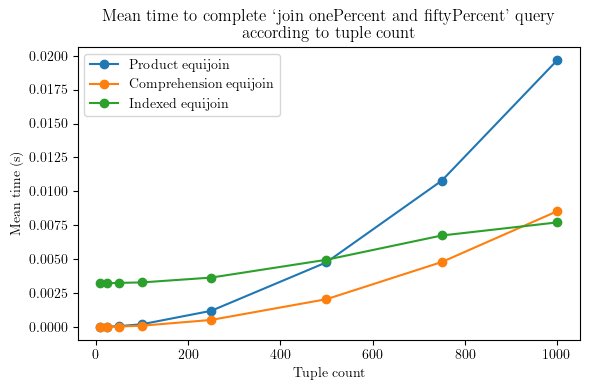

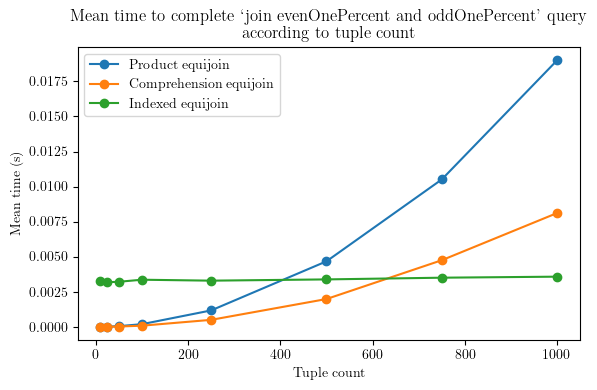

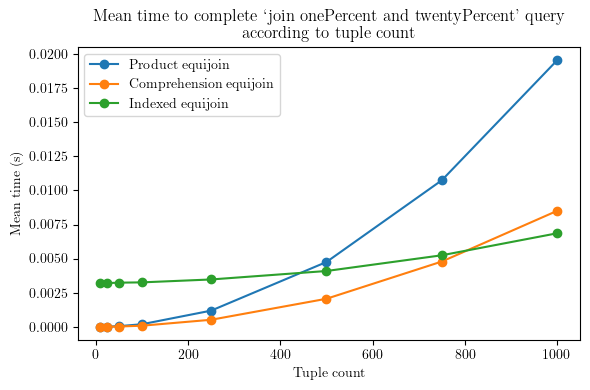

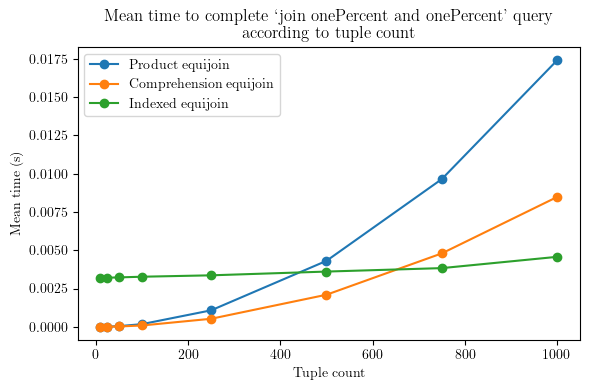

In [21]:
for group in groups:
    fig, ax = plt.subplots()
    lesser_counts_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group_name}-by-tuple-smallest"))

### Inset

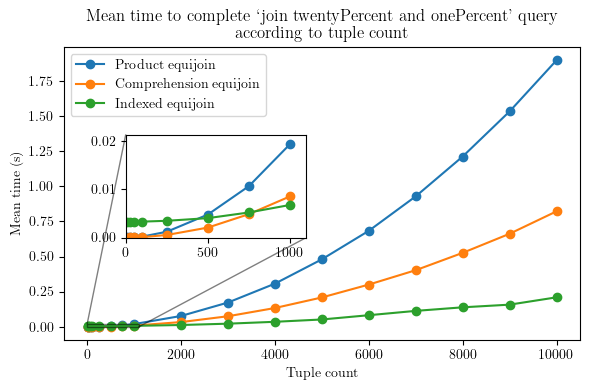

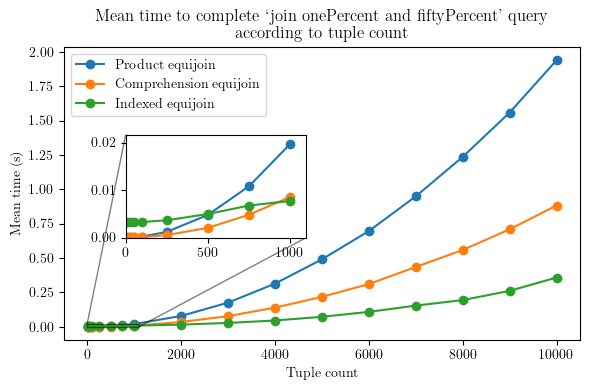

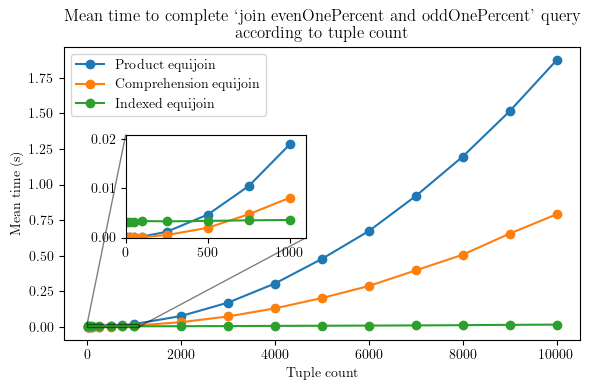

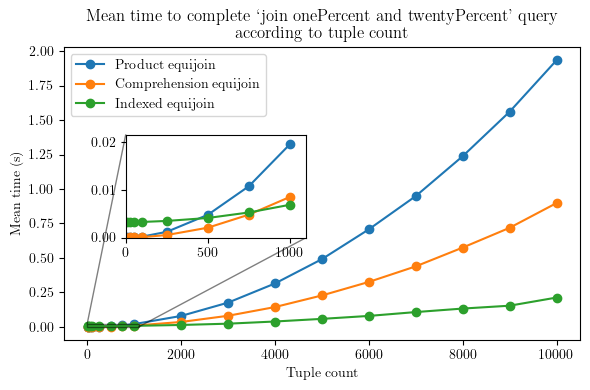

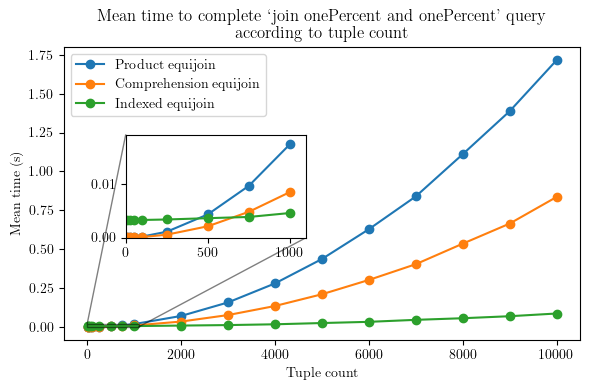

In [22]:
inset_axes_dimensions: List[float] = [0.12, 0.35, 0.35, 0.35]
for group in groups:
    fix, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count_with_inset_axes(ax, group, NUM_COUNT, inset_axes_dimensions, 1.1)
    plt.savefig(generate_figure_path(f"{group}-by-tuple-with-inset"))

## Creating graphs for report

### Showing all groups for a benchmark

In [23]:
functions = benchmark.get_function_name_list()
functions

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

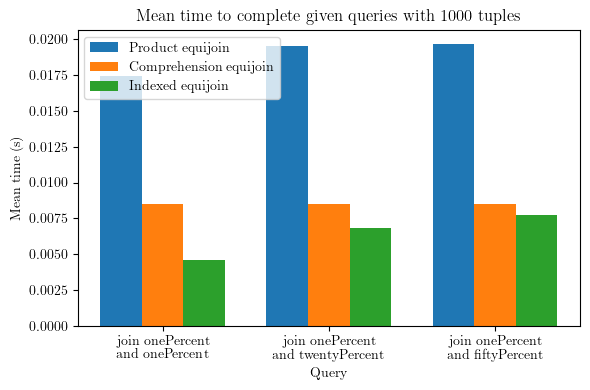

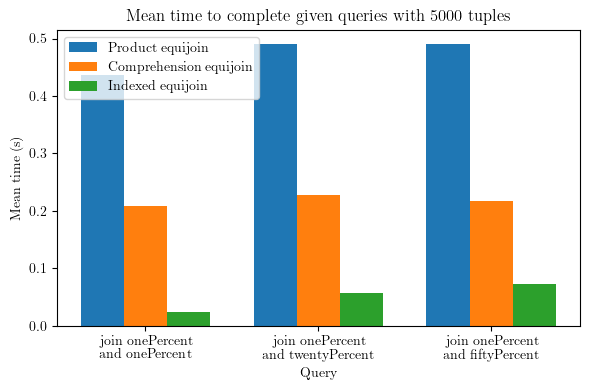

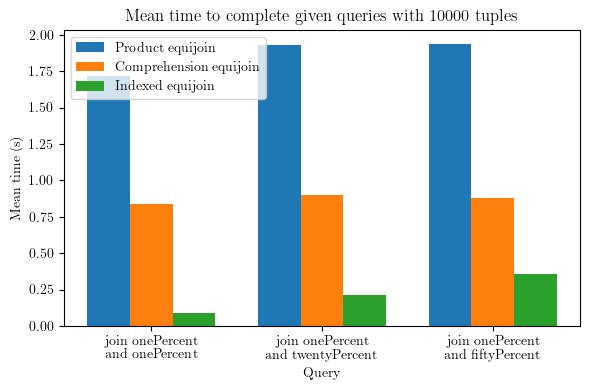

In [24]:
queries_to_display = ["join onePercent \nand onePercent", "join onePercent \nand twentyPercent", "join onePercent \nand fiftyPercent"]

counts: List[int] = [1000, 5000, 10000]

for benchmark in benchmarks.get_list_of_benchmarks_with_counts(counts):
    benchmark_plotter: BenchmarkPlotter = BenchmarkPlotter(benchmark)
    fig, ax = plt.subplots()
    benchmark_plotter.plot_given_queries(ax, queries_to_display)
    plt.savefig(generate_figure_path(f"onePercent joins with {benchmark.get_tuple_count()} tuples"))
    


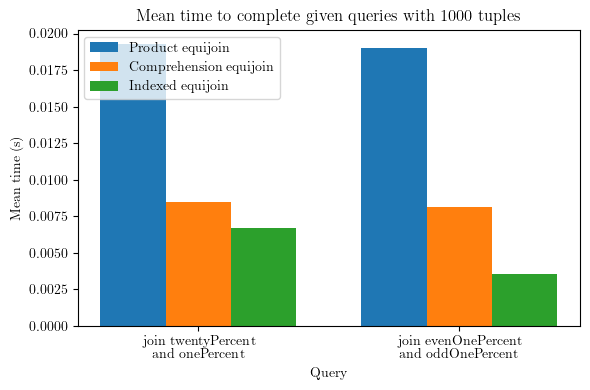

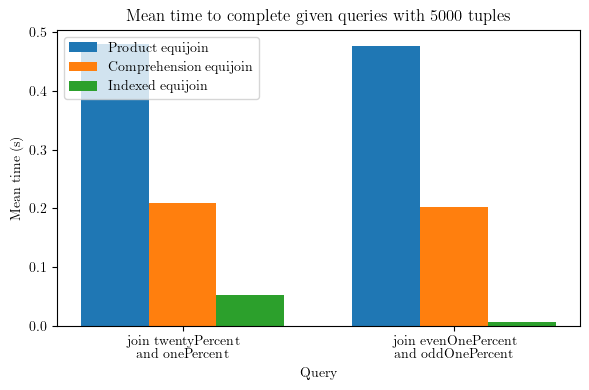

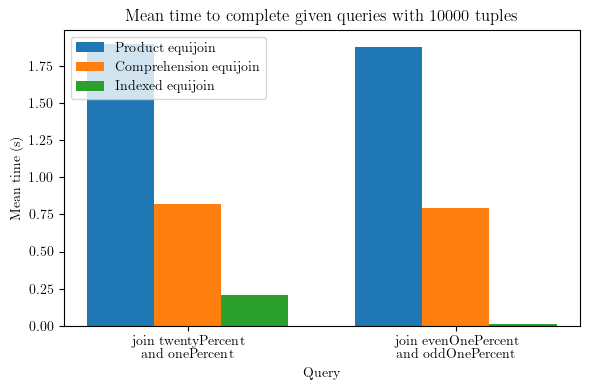

In [25]:
non_standard_queries: List[str] = ['join twentyPercent \nand onePercent', 'join evenOnePercent \nand oddOnePercent']

for benchmark in benchmarks.get_list_of_benchmarks_with_counts(counts):
    benchmark_plotter: BenchmarkPlotter = BenchmarkPlotter(benchmark)
    fix, ax = plt.subplots()
    benchmark_plotter.plot_given_queries(ax, non_standard_queries)
    plt.savefig(generate_figure_path(f"non standard query with {benchmark.get_tuple_count()} tuples"))

### Generating data

In [26]:
query: str = 'join onePercent and onePercent'

group_table_gen: BenchmarkGroupTableGenerator = BenchmarkGroupTableGenerator(benchmarks)
percentage_change_of_means: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, query)
save_df_as_table(percentage_change_of_means, f"percentage change of means {query}")

In [27]:
non_standard_query_mean_change_even_odd: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, 'join evenOnePercent and oddOnePercent')
non_standard_query_mean_change_twenty_one: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, 'join twentyPercent and onePercent')

print(non_standard_query_mean_change_even_odd)
print(non_standard_query_mean_change_twenty_one)

save_df_as_table(non_standard_query_mean_change_even_odd, "percentage change of means join evenOnePercent and oddOnePercent")
save_df_as_table(non_standard_query_mean_change_twenty_one, "percentage change of means join twentyPercent and onePercent")

                        1000 tuples  5000 tuples  10000 tuples
Product equijoin         -81.187829   -98.442521    -99.181323
Comprehension equijoin   -55.932181   -96.325369    -98.060049
                        1000 tuples  5000 tuples  10000 tuples
Product equijoin         -65.125860   -89.158245    -88.944901
Comprehension equijoin   -20.843916   -75.071061    -74.480953


## Comparing twentyPercent ones

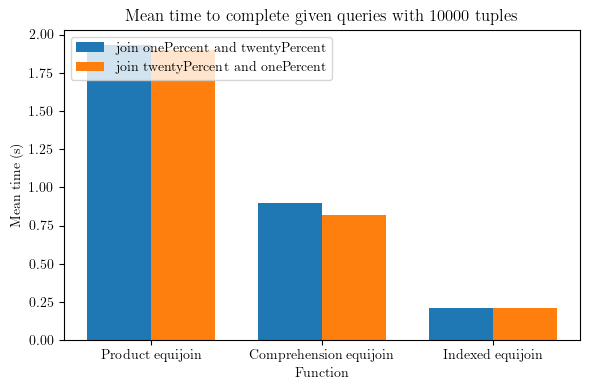

In [28]:
benchmark: BenchmarkData = benchmarks.get_benchmark_with_count(10000)
benchmark_plotter = BenchmarkPlotter(benchmark)

fig, ax = plt.subplots()
benchmark_plotter.compare_query_means(ax, ['join onePercent and twentyPercent', 'join twentyPercent and onePercent'])
plt.savefig(generate_figure_path(f"join onePercent and twentyPercent flipped {benchmark.get_tuple_count()} tuples"))

#### Percentage change of onePercent and twentyPercent
onePercent and twentyPercent is seen as the original

In [29]:
for benchmark in [benchmarks.get_benchmark_with_count(x) for x in [5000, 6000, 7000, 8000, 9000, 10000]]:
    print(benchmark.get_tuple_count())
    for function in benchmark.get_function_name_list():
        b1 = benchmark.get_benchmark_mean('join onePercent and twentyPercent', function)
        b2 = benchmark.get_benchmark_mean('join twentyPercent and onePercent', function)
        percentage_change: float = BenchmarkGroupTableGenerator.calculate_percentage_change(b1, b2)
        print(f"{function}: {percentage_change}")
    print("\n", end="")

5000
Product equijoin: -2.1265933526090643
Comprehension equijoin: -8.134548490954332
Indexed equijoin: -9.453255292173719

6000
Product equijoin: -3.3663296496121218
Comprehension equijoin: -7.64864273417113
Indexed equijoin: 4.580030772881654

7000
Product equijoin: -2.086186336592449
Comprehension equijoin: -8.124493557655315
Indexed equijoin: 6.064389906699446

8000
Product equijoin: -2.078752273004066
Comprehension equijoin: -8.41655619957358
Indexed equijoin: 4.8245389304403705

9000
Product equijoin: -1.7493835426188775
Comprehension equijoin: -7.804908172142532
Indexed equijoin: 2.9927871594708217

10000
Product equijoin: -1.905729033920625
Comprehension equijoin: -8.451301690451631
Indexed equijoin: -1.118707710696526



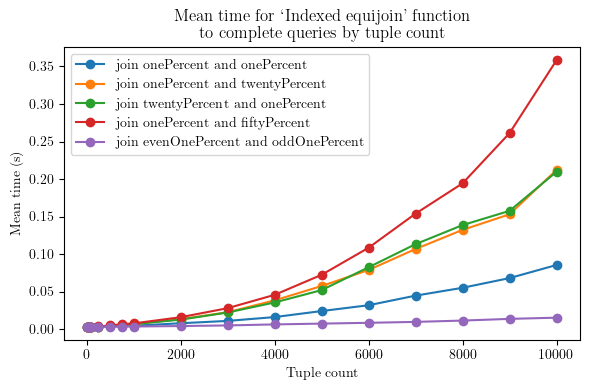

In [32]:
function: str = 'Indexed equijoin'
fig, ax = plt.subplots()
group_plotter.plot_mean_time_by_tuples_for_function(ax, function)
plt.savefig(generate_figure_path(f"{function} query comparison"))